# **Project Name :- Student's Placement Record Analysis**
- Project Type :- Data Science
- Project Contributor :- Aditya Dhumal

# **Project Overview**
The Student’s Placement Record Analysis project is a Data Science–based exploratory study aimed at identifying the key factors that influence campus placement outcomes. By analyzing academic, technical, and skill-based attributes of students, the project provides actionable insights into what truly matters for securing placements.

Through detailed exploratory data analysis, the project seeks to uncover hidden patterns, trends, and relationships within the dataset that differentiate placed students from non-placed students. By quantifying the relative importance of each feature, the study helps in understanding which aspects of a student’s profile contribute most strongly to employability.

Ultimately, the objective is to provide meaningful, actionable insights that can guide students in prioritizing skill development and academic improvement throughout their educational journey. In addition, the project aims to support educational institutions and training programs by offering data-backed evidence that can be used to design more effective placement preparation strategies and career guidance initiatives.


## **Objective**
- Analyze which features (CGPA, internships, coding skills, communication skills, etc.) have the strongest influence on placement outcomes.
- Help students understand what really matters for getting placed.

# **Hypothesis**
- A student’s academic performance, technical skills, internships, aptitude, and soft skills significantly influence their campus placement status.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Data Loading

In [2]:
df=pd.read_csv("train.csv")

# Data Exploration

In [3]:
df.head()

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed


In [4]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Degree', 'Branch', 'CGPA',
       'Internships', 'Projects', 'Coding_Skills', 'Communication_Skills',
       'Aptitude_Test_Score', 'Soft_Skills_Rating', 'Certifications',
       'Backlogs', 'Placement_Status'],
      dtype='object')

In [5]:
df.shape

(45000, 15)

In [6]:
df.describe()

,Student_ID,Age,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,24977.962600,20.999333,7.002290,0.774089,3.734222,5.691800,5.501644,69.385356,5.501644,1.800956,0.888133
std,14425.605704,1.995071,0.993855,0.844750,0.923738,1.994674,1.515374,13.909710,1.238722,0.650104,0.970954
min,1.000000,18.000000,4.500000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000
25%,12509.750000,19.000000,6.320000,0.000000,3.000000,4.000000,4.000000,60.000000,5.000000,1.000000,0.000000
50%,24957.500000,21.000000,7.000000,1.000000,4.000000,6.000000,6.000000,69.000000,5.000000,2.000000,1.000000
75%,37475.250000,23.000000,7.670000,1.000000,4.000000,7.000000,7.000000,79.000000,6.000000,2.000000,2.000000
max,50000.000000,24.000000,9.800000,3.000000,6.000000,10.000000,10.000000,100.000000,10.000000,3.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            45000 non-null  int64  
 1   Age                   45000 non-null  int64  
 2   Gender                45000 non-null  object 
 3   Degree                45000 non-null  object 
 4   Branch                45000 non-null  object 
 5   CGPA                  45000 non-null  float64
 6   Internships           45000 non-null  int64  
 7   Projects              45000 non-null  int64  
 8   Coding_Skills         45000 non-null  int64  
 9   Communication_Skills  45000 non-null  int64  
 10  Aptitude_Test_Score   45000 non-null  int64  
 11  Soft_Skills_Rating    45000 non-null  int64  
 12  Certifications        45000 non-null  int64  
 13  Backlogs              45000 non-null  int64  
 14  Placement_Status      45000 non-null  object 
dtypes: float64(1), int6

In [8]:
df.isnull().sum()

Student_ID              0
Age                     0
Gender                  0
Degree                  0
Branch                  0
CGPA                    0
Internships             0
Projects                0
Coding_Skills           0
Communication_Skills    0
Aptitude_Test_Score     0
Soft_Skills_Rating      0
Certifications          0
Backlogs                0
Placement_Status        0
dtype: int64

- Null values per column = 0
- Numerical fields [Internships, Projects, Coding_Skills, Communication_Skills, Aptitude_Test_Score, Soft_Skills_Rating, Certifications,Backlogs]
- Categorical fields [Student_ID, Age, Gender, Degree, Branch, CGPA]
- Target field [Placement_Status]

In [9]:
# Checking duplicae rows 
df[df.duplicated()]

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status


**No duplicate values hence the dataset contains all unique student information**

### Dataset information
- Student_ID - Unique identifiers for each student (4500 students)
- Age - Student's Age
- Gender - Gender of each student (Male/Female)
- Degree - Type of degree student is pursuing or completed (Eg: B.E/B.Tech)
- Branch - Specialization in field
- CGPA - Average CGPA of each student throught academic journey
- Internships - Number of internships student has completed as a fresher
- Projects - Number of projects students has built in their career journey
- Coding_Skills - Coding skills on a scale of 1-10 (1='Poor' , 10='Skilled')
- Communication_Skills - Communication skills of each student on a scale of 1-10 (1='Poor', 10='Excellent')
- Aptitude_Test_Score - Apptitude test score of each individual (out of 100)
- Soft_Skills_Rating - Soft skills ratings of each students (1-10)
- Certifications - No of certifications each student has completed 
- Backlogs - No of backlogs each student has. 
- Placement_Status - Actual target column contains value if student has placed or not 

# <center> **Exploratory Data Analysis (EDA)** </center>

In [10]:
#Seperating truly numerical features and categorical features 
Num_features = df.describe().drop(columns=['Student_ID','Age']).columns.values
Cat_features=df.drop(columns=Num_features).columns.values

In [11]:
Cat_features

array(['Student_ID', 'Age', 'Gender', 'Degree', 'Branch',
       'Placement_Status'], dtype=object)

In [12]:
Num_features=df.columns.drop(['Student_ID', 'Age', 'Gender', 'Degree', 'Branch',
       'Placement_Status'])

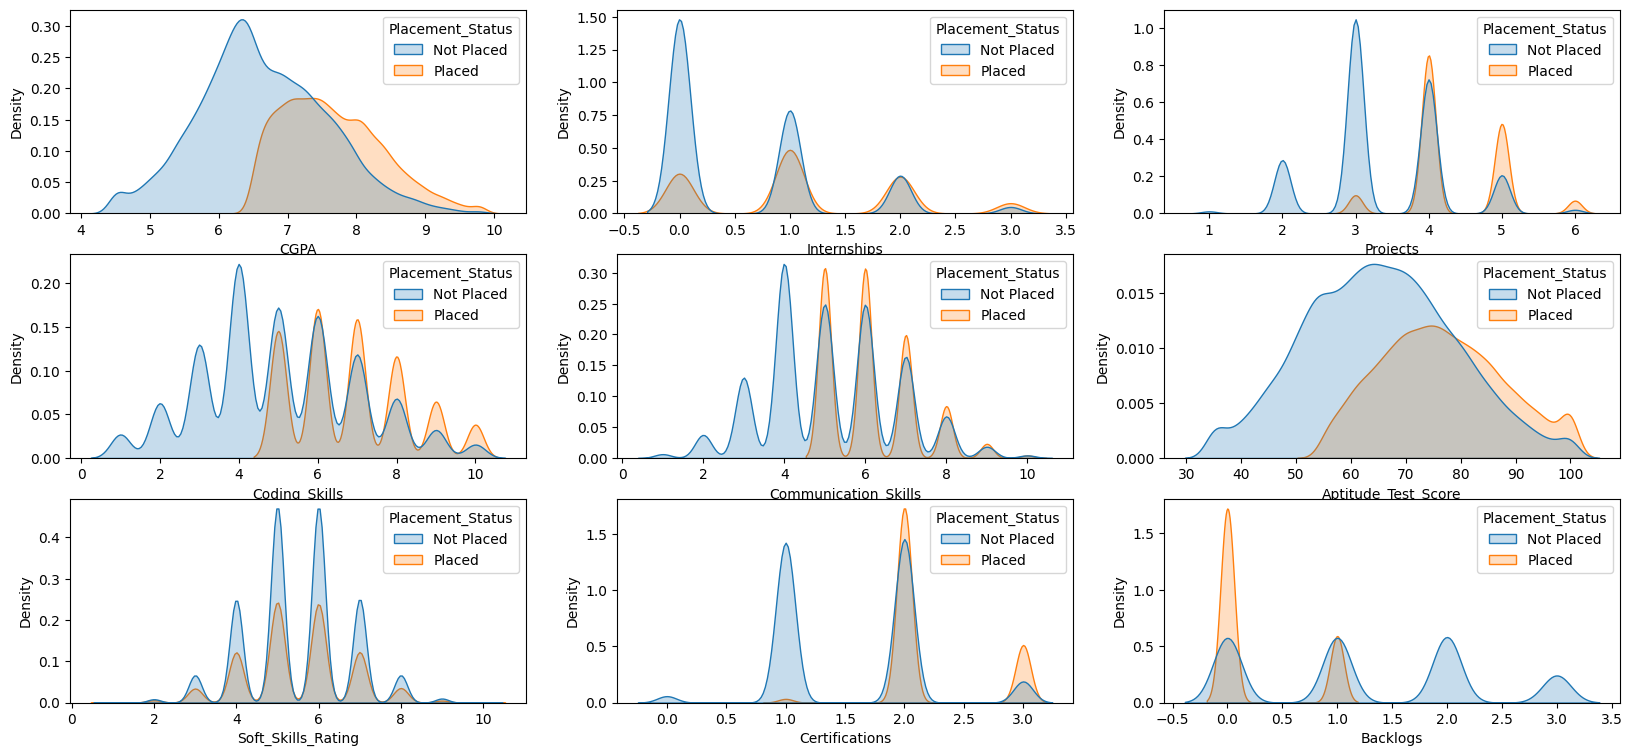

In [13]:
plt.figure(figsize=(20,9))
for i in range(0,len(Num_features)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[Num_features[i]],fill=True,hue=df['Placement_Status'])

- **Students with CGPA more than 7.5 approx have higher chance of getting placed**
- **Students with more than 1 internship have higher chance of getting placed**
- **Students have to build atleast 4 projects to get placed**
- **Students with more than 6 out of 10 score in coding skills have higher chance of getting placed**
- **Students with more than 5 out of 10 rating in communication skills are getting placed**
- **Atleast 80% + scorer students in aptitude are getting placed**
- **Soft Skills are not impacting placemets at all**
- **Students needs atleast 2 certifications for getting placements**
- **Students with 0 backlogs are getting placed**

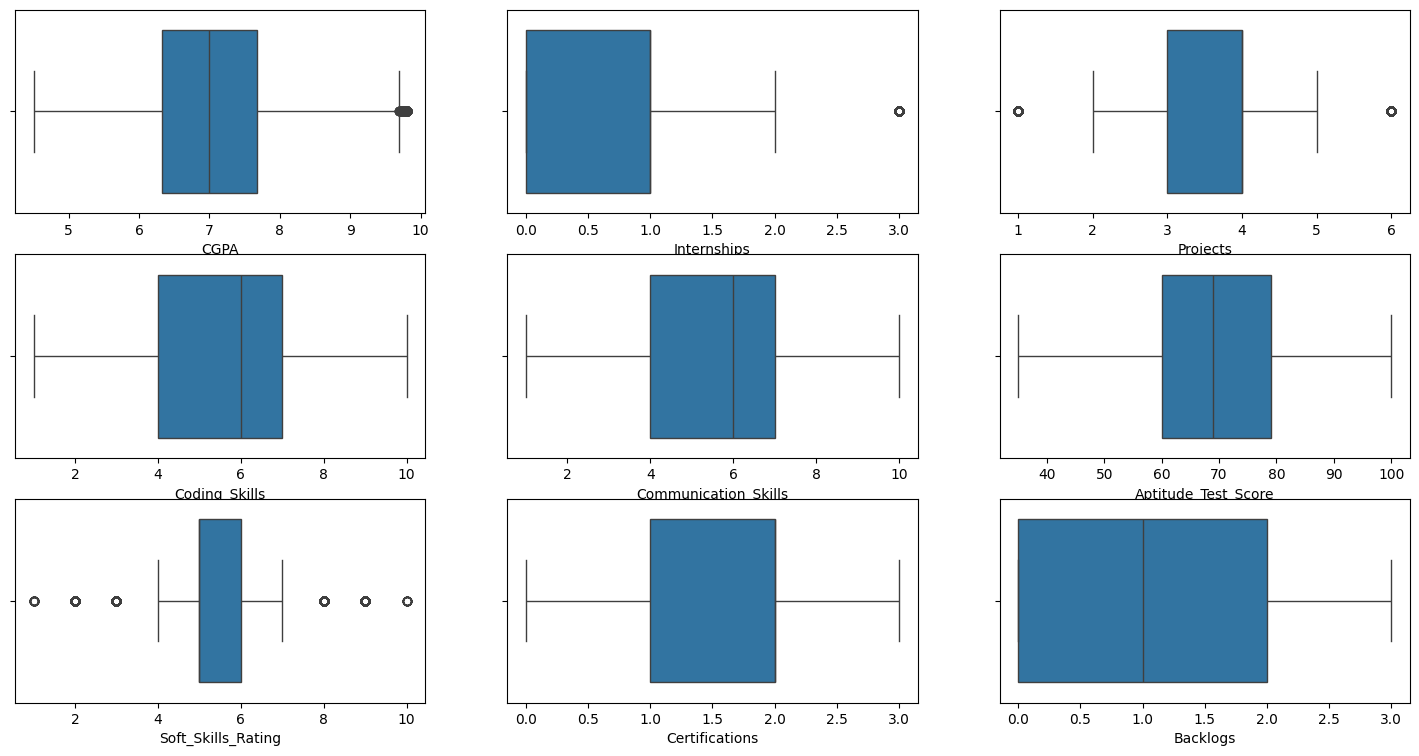

In [14]:
plt.figure(figsize=(18,9))
for i in range(0,len(Num_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[Num_features[i]])

In [15]:
Num_features

Index(['CGPA', 'Internships', 'Projects', 'Coding_Skills',
       'Communication_Skills', 'Aptitude_Test_Score', 'Soft_Skills_Rating',
       'Certifications', 'Backlogs'],
      dtype='object')

In [16]:
df

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,9362,20,Male,MCA,Civil,7.84,2,5,9,7,68,6,3,1,Placed
44996,8940,19,Female,B.Sc,ME,8.28,1,4,6,5,74,5,2,0,Placed
44997,13097,20,Female,B.Sc,Civil,8.88,0,4,4,5,83,4,2,0,Not Placed
44998,12958,24,Female,MCA,ECE,5.90,1,3,6,6,60,2,2,1,Not Placed


In [17]:
Cat_features=df.columns.drop(['CGPA', 'Internships', 'Projects', 'Coding_Skills',
       'Communication_Skills', 'Aptitude_Test_Score', 'Soft_Skills_Rating',
       'Certifications', 'Backlogs','Student_ID','Placement_Status'])

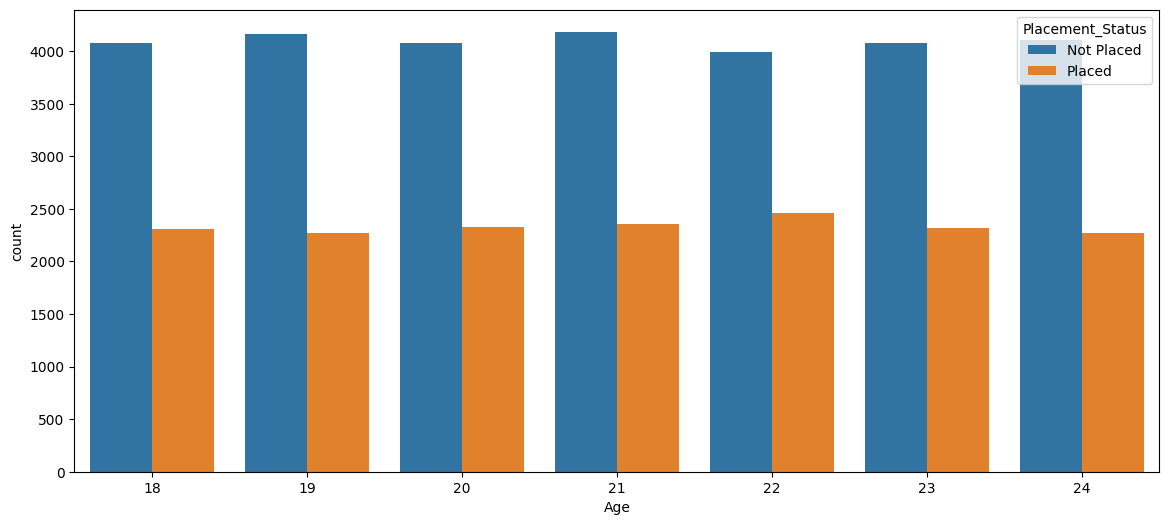

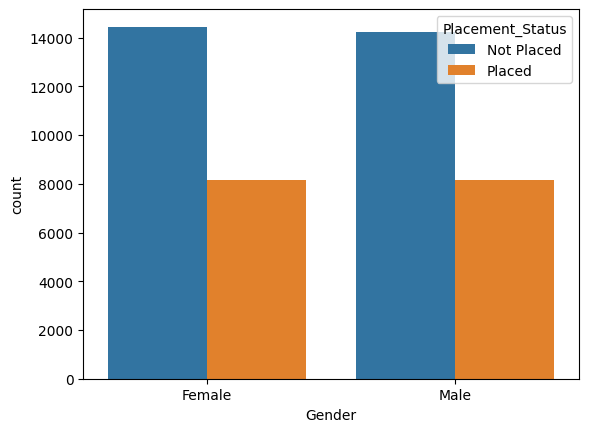

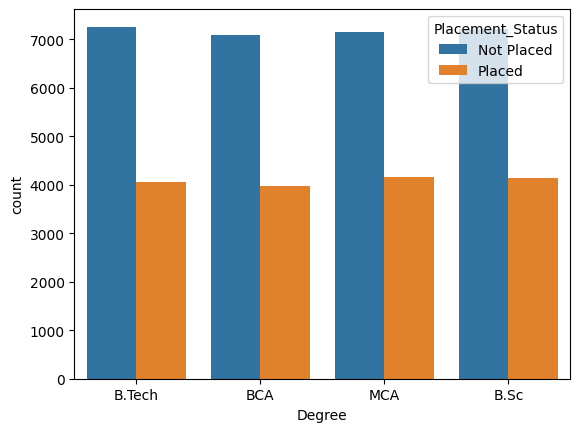

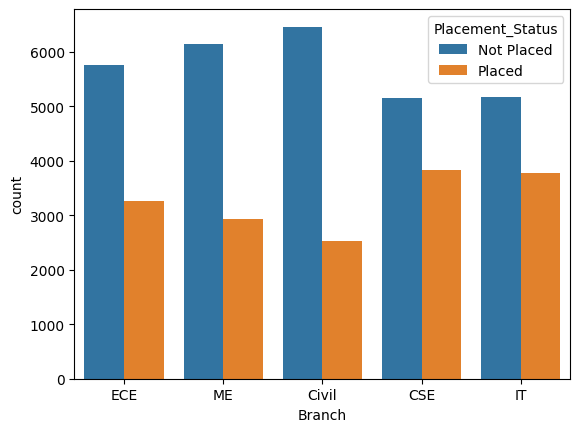

In [18]:
plt.figure(figsize=(14,6))
for i in range(0, len(Cat_features)):
  # plt.subplot(2,2,i+1)
  sns.countplot(x=df[Cat_features[i]],hue=df['Placement_Status'])
  plt.show()

- **Categorical features have no major impact on placements**
- **Students with civil branch are struggling to get placed**

([<matplotlib.patches.Wedge at 0x1f008a85fd0>,
 [Text(-0.4605608223312712, 0.9989413040482126, 'Not Placed'),
  Text(0.4605606714953255, -0.9989413735909506, 'Placed')],
 [Text(-0.25121499399887515, 0.5448770749353886, '63.75'),
  Text(0.25121491172472293, -0.5448771128677912, '36.25')])

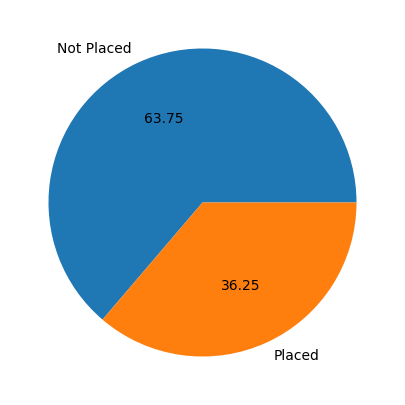

In [19]:
plt.figure(figsize=(18,5))
plt.pie(df['Placement_Status'].value_counts(),labels=['Not Placed','Placed'],autopct="%0.2f")

In [20]:
df.head()

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed


# <center>**DATA PREPROCESSING**</center>

In [21]:
df

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,1048,22,Female,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,Not Placed
1,37820,20,Female,BCA,ECE,6.05,1,4,6,8,59,8,2,1,Not Placed
2,49668,22,Male,MCA,ME,7.22,1,4,6,6,58,6,2,2,Not Placed
3,19467,22,Male,MCA,ME,7.78,2,4,6,6,90,4,2,0,Placed
4,23094,20,Female,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,9362,20,Male,MCA,Civil,7.84,2,5,9,7,68,6,3,1,Placed
44996,8940,19,Female,B.Sc,ME,8.28,1,4,6,5,74,5,2,0,Placed
44997,13097,20,Female,B.Sc,Civil,8.88,0,4,4,5,83,4,2,0,Not Placed
44998,12958,24,Female,MCA,ECE,5.90,1,3,6,6,60,2,2,1,Not Placed


In [22]:
df=df.drop(columns=['Student_ID'])

In [23]:
df['Gender']=df['Gender'].replace({'Female':1,'Male':0}).astype(int)
df['Placement_Status']=df['Placement_Status'].replace({'Not Placed':0,'Placed':1})
df

C:\Users\Dell\AppData\Local\Temp\ipykernel_14960\4158227448.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'Female':1,'Male':0}).astype(int)
C:\Users\Dell\AppData\Local\Temp\ipykernel_14960\4158227448.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Placement_Status']=df['Placement_Status'].replace({'Not Placed':0,'Placed':1})


,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,22,1,B.Tech,ECE,6.29,0,3,4,6,51,5,1,3,0
1,20,1,BCA,ECE,6.05,1,4,6,8,59,8,2,1,0
2,22,0,MCA,ME,7.22,1,4,6,6,58,6,2,2,0
3,22,0,MCA,ME,7.78,2,4,6,6,90,4,2,0,1
4,20,1,B.Tech,ME,7.63,1,4,6,5,79,6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,20,0,MCA,Civil,7.84,2,5,9,7,68,6,3,1,1
44996,19,1,B.Sc,ME,8.28,1,4,6,5,74,5,2,0,1
44997,20,1,B.Sc,Civil,8.88,0,4,4,5,83,4,2,0,0
44998,24,1,MCA,ECE,5.90,1,3,6,6,60,2,2,1,0


## Feature Encoding

In [24]:
branch_encoded=pd.get_dummies(df['Branch']).replace({True:1,False:0})
degree_encoded=pd.get_dummies(df['Degree']).replace({True:1,False:0})

C:\Users\Dell\AppData\Local\Temp\ipykernel_14960\4076769737.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  branch_encoded=pd.get_dummies(df['Branch']).replace({True:1,False:0})
C:\Users\Dell\AppData\Local\Temp\ipykernel_14960\4076769737.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  degree_encoded=pd.get_dummies(df['Degree']).replace({True:1,False:0})


In [25]:
new_df=pd.concat([df,branch_encoded,degree_encoded],axis=1).drop(columns=['Branch','Degree'])
new_df

,Age,Gender,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,...,Placement_Status,CSE,Civil,ECE,IT,ME,B.Sc,B.Tech,BCA,MCA
0,22,1,6.29,0,3,4,6,51,5,1,...,0,0,0,1,0,0,0,1,0,0
1,20,1,6.05,1,4,6,8,59,8,2,...,0,0,0,1,0,0,0,0,1,0
2,22,0,7.22,1,4,6,6,58,6,2,...,0,0,0,0,0,1,0,0,0,1
3,22,0,7.78,2,4,6,6,90,4,2,...,1,0,0,0,0,1,0,0,0,1
4,20,1,7.63,1,4,6,5,79,6,2,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,20,0,7.84,2,5,9,7,68,6,3,...,1,0,1,0,0,0,0,0,0,1
44996,19,1,8.28,1,4,6,5,74,5,2,...,1,0,0,0,0,1,1,0,0,0
44997,20,1,8.88,0,4,4,5,83,4,2,...,0,0,1,0,0,0,1,0,0,0
44998,24,1,5.90,1,3,6,6,60,2,2,...,0,0,0,1,0,0,0,0,0,1


# Sample Model evaluation

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
X = new_df.drop(columns=['Placement_Status'])
y = new_df['Placement_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (36000, 20)
Testing set shape: (9000, 20)


In [40]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [41]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1], shape=(9000,))

In [42]:
y_test

26383    0
20111    1
24831    0
29805    0
18413    0
        ..
11598    0
43665    0
9831     0
28042    1
33984    1
Name: Placement_Status, Length: 9000, dtype: int64

In [43]:
# %%
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5738
           1       1.00      1.00      1.00      3262

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



# **Test CSV Evaluation**

In [45]:
test_df=pd.read_csv('test.csv')

In [46]:
test_df.head(3)

,Student_ID,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,15202,23,Male,B.Tech,Civil,7.32,2,4,5,6,56,6,1,0,Placed
1,4573,24,Female,MCA,ME,4.76,0,1,1,4,37,4,0,3,Not Placed
2,34424,20,Male,BCA,ME,6.16,0,3,3,8,68,6,1,3,Not Placed


In [47]:
test_df=test_df.drop(columns=['Student_ID'])

In [49]:
test_df['Gender']=test_df['Gender'].replace({'Female':1,'Male':0}).astype(int)
test_df['Placement_Status']=test_df['Placement_Status'].replace({'Not Placed':0,'Placed':1})
test_df

C:\Users\Dell\AppData\Local\Temp\ipykernel_14960\3263614586.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['Placement_Status']=test_df['Placement_Status'].replace({'Not Placed':0,'Placed':1})


,Age,Gender,Degree,Branch,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,Backlogs,Placement_Status
0,23,0,B.Tech,Civil,7.32,2,4,5,6,56,6,1,0,1
1,24,1,MCA,ME,4.76,0,1,1,4,37,4,0,3,0
2,20,0,BCA,ME,6.16,0,3,3,8,68,6,1,3,0
3,19,0,B.Sc,IT,8.77,2,5,8,5,83,6,3,0,1
4,23,0,B.Tech,ME,7.63,0,3,4,6,66,7,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19,1,MCA,Civil,4.91,0,1,1,5,47,5,0,3,0
4996,20,0,B.Tech,ECE,6.82,2,3,5,7,76,6,2,0,1
4997,20,0,BCA,IT,5.80,0,3,6,7,56,6,2,2,0
4998,23,1,B.Tech,IT,7.67,1,4,7,6,67,4,2,0,1


In [50]:
branch_encoded_test=pd.get_dummies(test_df['Branch']).replace({True:1,False:0})
degree_encoded_test=pd.get_dummies(test_df['Degree']).replace({True:1,False:0})

C:\Users\Dell\AppData\Local\Temp\ipykernel_14960\1571188503.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  branch_encoded_test=pd.get_dummies(test_df['Branch']).replace({True:1,False:0})
C:\Users\Dell\AppData\Local\Temp\ipykernel_14960\1571188503.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  degree_encoded_test=pd.get_dummies(test_df['Degree']).replace({True:1,False:0})


In [51]:
new_df_test=pd.concat([test_df,branch_encoded_test,degree_encoded_test],axis=1).drop(columns=['Branch','Degree'])
new_df_test

,Age,Gender,CGPA,Internships,Projects,Coding_Skills,Communication_Skills,Aptitude_Test_Score,Soft_Skills_Rating,Certifications,...,Placement_Status,CSE,Civil,ECE,IT,ME,B.Sc,B.Tech,BCA,MCA
0,23,0,7.32,2,4,5,6,56,6,1,...,1,0,1,0,0,0,0,1,0,0
1,24,1,4.76,0,1,1,4,37,4,0,...,0,0,0,0,0,1,0,0,0,1
2,20,0,6.16,0,3,3,8,68,6,1,...,0,0,0,0,0,1,0,0,1,0
3,19,0,8.77,2,5,8,5,83,6,3,...,1,0,0,0,1,0,1,0,0,0
4,23,0,7.63,0,3,4,6,66,7,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19,1,4.91,0,1,1,5,47,5,0,...,0,0,1,0,0,0,0,0,0,1
4996,20,0,6.82,2,3,5,7,76,6,2,...,1,0,0,1,0,0,0,1,0,0
4997,20,0,5.80,0,3,6,7,56,6,2,...,0,0,0,0,1,0,0,0,1,0
4998,23,1,7.67,1,4,7,6,67,4,2,...,1,0,0,0,1,0,0,1,0,0


In [52]:
x_test = new_df_test.drop(columns=['Placement_Status'])
Y_test = new_df_test['Placement_Status']

In [53]:
y_preds = rf_model.predict(x_test)
y_preds

array([1, 0, 0, ..., 0, 1, 0], shape=(5000,))

In [54]:
Y_test

0       1
1       0
2       0
3       1
4       0
       ..
4995    0
4996    1
4997    0
4998    1
4999    0
Name: Placement_Status, Length: 5000, dtype: int64

In [55]:
print("Accuracy:", accuracy_score(Y_test, y_preds))

Accuracy: 1.0
